# Regression Models

Bias--variance tradeoff is key.

### Regression Pipeline Overview
```text
Data -> [Train/Test Split] -> [Train Model] -> [Predict] -> [Evaluate]
```

### Linear Regression
We model the target as $$y = Xw + b$$ and minimize the mean squared error:
$$	ext{MSE}=\frac{1}{n}\sum_{i=1}^n (y_i-\hat{y}_i)^2$$

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = pd.read_csv('../data/house_prices.csv')
y = X.pop('SalePrice')
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
model=LinearRegression().fit(X_train,y_train)
model.score(X_test,y_test)

0.9999996298908006

### Ridge Regression
Adds L2 penalty to the loss function:
$$\hat{w}=\arg\min_w \|y-Xw\|^2+\alpha \|w\|^2$$

In [26]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=1e2).fit(X_train,y_train)
ridge.score(X_test,y_test)

0.9853775496981126

### Lasso Regression
Uses an L1 penalty to encourage sparsity:
$$\hat{w}=\arg\min_w \|y-Xw\|^2+\alpha \|w\|_1$$

In [28]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=1e1).fit(X_train,y_train)
lasso.score(X_test,y_test)

0.9718140862964773

To find the largest penalty value that still gives a non-zero model (often called $\lambda_{\text{max}}$ or $\alpha_{\text{max}}$), we use the fact that Lasso drops all coefficients to zero once the penalty exceeds the largest absolute correlation between any feature and the target.

**Formula**

$$\lambda_{\text{max}} = \frac{1}{n} \max_j |X_j^\top y|$$

Here, $X$ is the $n \times p$ matrix of centered features and $y$ is the centered response vector. $X_j$ denotes the $j$-th column of $X$.


In [4]:
import numpy as np

# X: (n, p) design matrix with centered columns
# y: (n,) target vector, centered
n = X.shape[0]
alpha_max = np.max(np.abs(X.T @ y)) / n


### L1 vs L2 Regularization

L1 (lasso) adds the absolute value of coefficients to the loss, encouraging sparsity by driving some weights to exactly zero. L2 (ridge) adds the squared magnitude of coefficients, shrinking them toward zero but rarely eliminating features entirely.

In [29]:
ridge_preds = ridge.predict(X_test.iloc[:3])
lasso_preds = lasso.predict(X_test.iloc[:3])
pd.DataFrame({'Ridge': ridge_preds, 'Lasso': lasso_preds})

,Ridge,Lasso
0,177.728930,180.198462
1,-10.622629,-11.773962
2,-63.684370,-51.607001


### Lasso as Feature Eliminator
Lasso can automatically drop irrelevant features by forcing their coefficients to zero.

In [30]:
coef_series = pd.Series(lasso.coef_, index=X_train.columns)
eliminated_features = list(coef_series[coef_series == 0].index)
eliminated_features

['Feature8']

### ElasticNet Regression
Combines L1 and L2 penalties to balance between Ridge and Lasso.

In [33]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=1, l1_ratio=0.5, random_state=0).fit(X_train, y_train)
elastic.score(X_test, y_test)

0.8814958510089848

### Random Forest Regression
An ensemble of decision trees that reduces variance by averaging multiple trees.

In [34]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0).fit(X_train, y_train)
rf.score(X_test, y_test)

0.8226284810031715

### Regularization Strength and Model Performance
To illustrate how adjusting the regularization penalty impacts performance, let's explore Ridge and Lasso regression on the diabetes dataset.

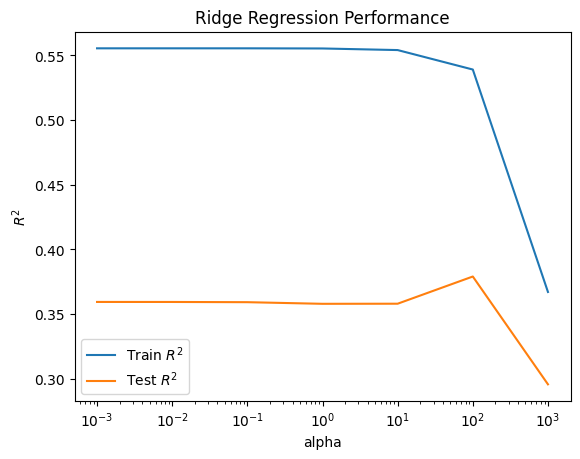

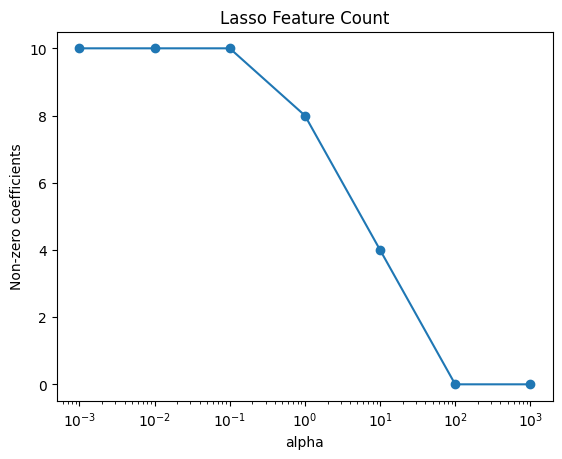

In [8]:

from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

alphas = np.logspace(-3, 3, 7)
ridge_train, ridge_test, lasso_nonzero = [], [], []

for alpha in alphas:
    ridge = Ridge(alpha=alpha).fit(X_train_scaled, y_train)
    ridge_train.append(ridge.score(X_train_scaled, y_train))
    ridge_test.append(ridge.score(X_test_scaled, y_test))
    lasso = Lasso(alpha=alpha, max_iter=10000).fit(X_train_scaled, y_train)
    lasso_nonzero.append(np.sum(lasso.coef_ != 0))

plt.semilogx(alphas, ridge_train, label='Train $R^2$')
plt.semilogx(alphas, ridge_test, label='Test $R^2$')
plt.xlabel('alpha')
plt.ylabel('$R^2$')
plt.title('Ridge Regression Performance')
plt.legend()
plt.show()

plt.semilogx(alphas, lasso_nonzero, marker='o')
plt.xlabel('alpha')
plt.ylabel('Non-zero coefficients')
plt.title('Lasso Feature Count')
plt.show()


Increasing the penalty (`alpha`) shrinks coefficients. In Ridge, large `alpha` reduces both training and test scores due to high bias, while too small `alpha` can overfit. Lasso drives more coefficients to zero as `alpha` grows, highlighting its feature selection behavior.

### Advantages and Disadvantages
**Advantages**:
- Simple to interpret coefficients.
- Fast to train.
**Disadvantages**:
- Assumes linear relationships.
- Sensitive to outliers.

### Usage Example

In [7]:
model.predict(X_test.iloc[:2])

array([202.22093264, -12.19762234])

### Results and Interpretation
The prediction snippet above demonstrates how the trained regression model outputs continuous values for new samples. Interpreting coefficients helps identify feature influence, while residual analysis reveals model fit quality.

### Linear Regression Refresher

Linear regression models a target variable $y$ as a linear combination of features $x_1, \ldots, x_p$:

$$\hat{y} = \beta_0 + \beta_1 x_1 + \cdots + \beta_p x_p$$

The optimal coefficients minimize the residual sum of squares:

$$\min_\beta \|y - X\beta\|^2,$$

which has the closed-form solution (normal equation):

$$\hat{\beta} = (X^\top X)^{-1} X^\top y.$$


### Worked Example: Interpreting Coefficients

```python
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([[800], [1000], [1200]])  # square footage
y = np.array([150_000, 200_000, 230_000])
model = LinearRegression().fit(X, y)

print(model.intercept_)
print(model.coef_)
print(model.predict([[900]]))
```

The intercept represents the predicted price for a home with zero square feet, and the coefficient indicates the expected change in price for each additional square foot. The final line predicts the price for a 900 square-foot home.


### Exercises & Further Reading
1. Add Ridge/Lasso.
2. Perform cross validation.
3. [sklearn linear models](https://scikit-learn.org/stable/modules/linear_model.html)
4. Plot residuals for a fitted model and comment on any patterns.
5. Use `PolynomialFeatures` to fit a quadratic curve and compare it to the linear fit.
6. Derive the normal equation yourself and verify the solution using NumPy.
7. Implement `ElasticNet` and compare its performance to Ridge and Lasso.
8. Evaluate the model using mean absolute error and compare it with mean squared error.
9. Use `Lasso` to eliminate features and retrain a linear regression model.
10. Train a `RandomForestRegressor` and inspect its feature importances.
11. Fit an `SVR` model and compare its predictions to linear regression.
12. Investigate how varying `alpha` affects `Ridge` and `Lasso` coefficient magnitudes.
13. Try scaling features before regularization and observe the impact on coefficients.
